In [28]:
import numpy as np
import cv2 as cv
import os
import matplotlib.pyplot as plt

In [29]:
root = '/home/turnyur/sommer-sem-2024/CV/Exercises/'
res_00 = '00/exercise_0_introduction/resources'

file = 'umah.jpeg'  ## path to the image
input_path = os.path.join(root, res_00, file)
img = cv2.imread(input_path, cv2.IMREAD_COLOR)
img_array = np.array(img) 
img_array.shape

(390, 302, 3)

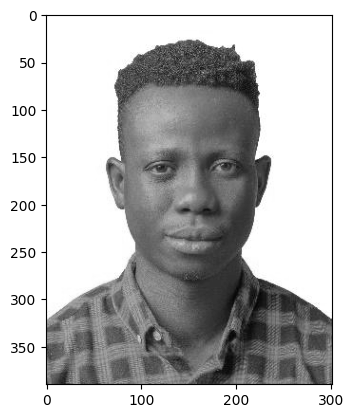

In [39]:
# from BRG to RBG
red_c, green_c ,blue_c =  img_array[:,:,2], img_array[:,:,1], img_array[:,:,2]
gray_image =cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')


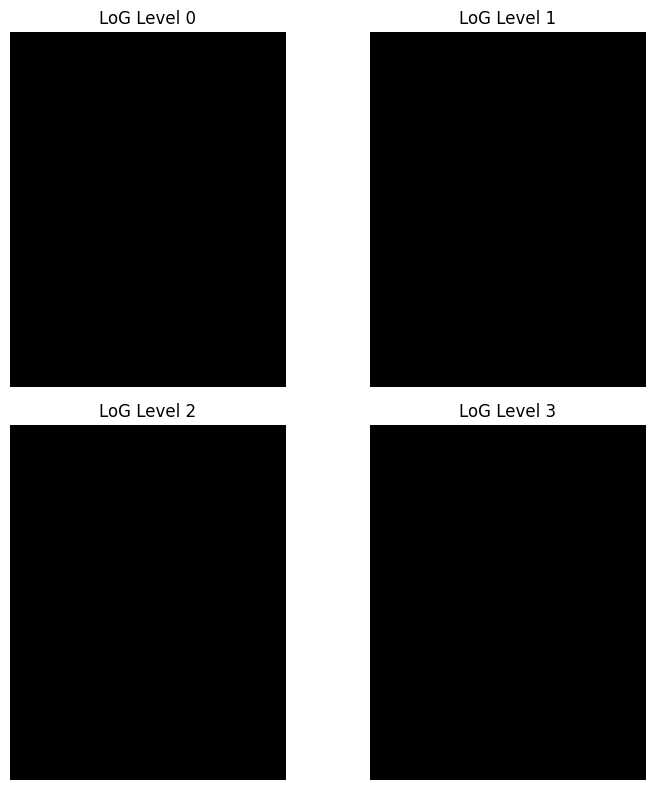

In [40]:
# Feature detection, Laplacian of Guassian


# Laplacian of Gaussian 
# LoG


def gaussian_filter(size: int, sigma: float) -> np.ndarray:
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * (ax**2) / sigma**2)
    gauss = gauss / np.sum(gauss)
    gaussian_filter_2d = np.outer(gauss, gauss)
    return gaussian_filter_2d

def laplacian_of_gaussian(size: int, sigma: float) -> np.ndarray:
    """Create a Laplacian of Gaussian filter."""
    ax = np.linspace(-(size // 2), size // 2, size)  # Define ax here
    gauss = gaussian_filter(size, sigma)
    laplacian = - (1 / (2 * np.pi * sigma**4)) * (1 - (ax**2 + ax[:, np.newaxis]) / (2 * sigma**2)) * gauss
    return laplacian

# Initialize parameters
subsample_factor = 2
pyramid_levels = 4

# Create a Laplacian of Gaussian filter
log_filter = laplacian_of_gaussian(5, sigma=1)  # Adjust size and sigma as needed

# Initialize the current image as the original image
current_image = gray_image.copy()

plt.figure(figsize=(8, 8))

for i in range(pyramid_levels):
    # Apply the Laplacian of Gaussian filter
    log_image = cv.filter2D(current_image, ddepth=-1, kernel=log_filter)
    
    # Plot the filtered image in the appropriate subplot
    plt.subplot(2, 2, i + 1)  # Adjust subplot index
    plt.imshow(log_image, cmap='gray')
    plt.title(f'LoG Level {i}')
    plt.axis('off')  # Hide axis

    # Subsample the current image for the next level
    current_image = current_image[::subsample_factor, ::subsample_factor]

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


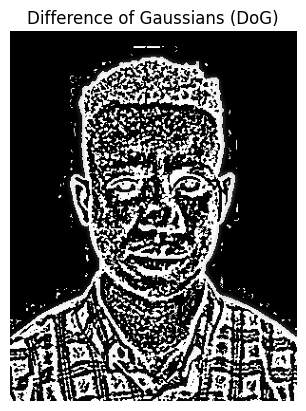

In [41]:
# Approximating LoG with DoG

sigma1 = 1.0
sigma2 = 2.0

# Apply Gaussian blurs with two different sigmas
gaussian_blur_1 = cv2.GaussianBlur(gray_image, (0, 0), sigma1)
gaussian_blur_2 = cv2.GaussianBlur(gray_image, (0, 0), sigma2)

# Compute the Difference of Gaussians (DoG)
dog_image = gaussian_blur_1 - gaussian_blur_2

# Normalize the DoG image for better visualization (optional)
dog_image_normalized = cv2.normalize(dog_image, None, 0, 255, cv2.NORM_MINMAX)

# Display the DoG result
plt.imshow(dog_image_normalized, cmap='gray')
plt.title('Difference of Gaussians (DoG)')
plt.axis('off')
plt.show()

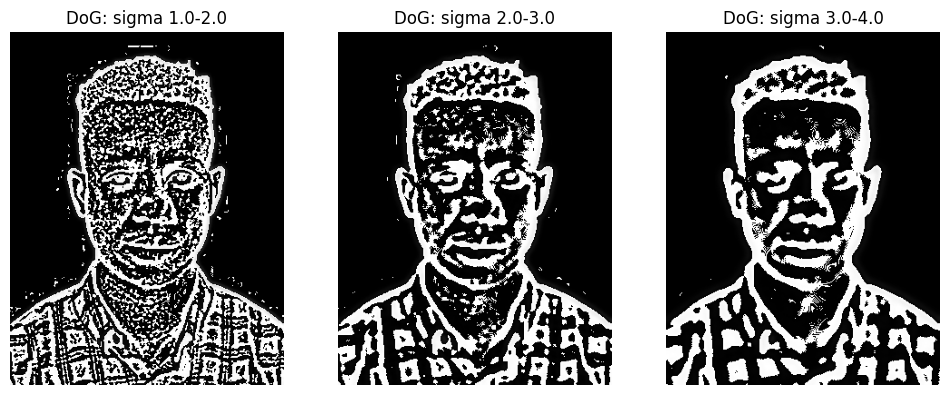

In [43]:
sigma_levels = [1.0, 2.0, 3.0, 4.0]  # Example sigma levels

# Create a list to store DoG results at each level
dog_images = []

# Loop through the sigma levels and compute DoG
for i in range(1, len(sigma_levels)):
    # Apply Gaussian blur for the current and previous sigma levels
    gaussian_blur_1 = cv2.GaussianBlur(gray_image, (0, 0), sigma_levels[i-1])
    gaussian_blur_2 = cv2.GaussianBlur(gray_image, (0, 0), sigma_levels[i])
    
    # Compute the DoG for the current level
    dog_image = gaussian_blur_1 - gaussian_blur_2
    
    # Normalize for better visualization (optional)
    dog_image_normalized = cv2.normalize(dog_image, None, 0, 255, cv2.NORM_MINMAX)
    
    # Store the DoG result
    dog_images.append(dog_image_normalized)

# Plot the results for all DoG levels
plt.figure(figsize=(12, 8))
for i, dog_image in enumerate(dog_images):
    plt.subplot(1, len(dog_images), i+1)
    plt.imshow(dog_image, cmap='gray')
    plt.title(f'DoG: sigma {sigma_levels[i]}-{sigma_levels[i+1]}')
    plt.axis('off')

plt.show()

In [46]:
# Find local maxima in position-scale space of DoG
from scipy.ndimage import maximum_filter

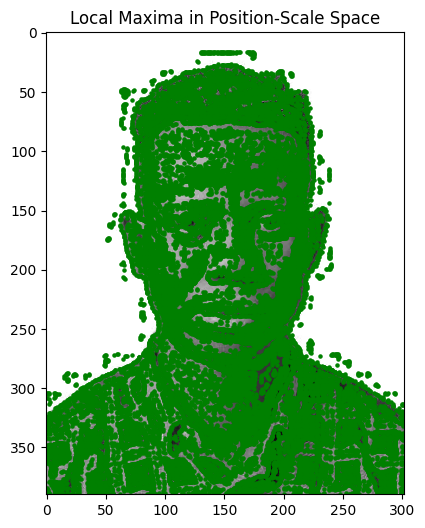

In [57]:

sigma_levels = [1.0, 2.0, 3.0, 4.0, 5.0]  # Example sigma levels

# Create an empty list to store the DoG images at each scale
dog_stack = []

# Compute the DoG images for each level
for i in range(1, len(sigma_levels)):
    # Apply Gaussian blur for two consecutive sigma levels
    gaussian_blur_1 = cv2.GaussianBlur(gray_image, (0, 0), sigma_levels[i-1])
    gaussian_blur_2 = cv2.GaussianBlur(gray_image, (0, 0), sigma_levels[i])
    
    # Compute DoG for the current scale
    dog_image = gaussian_blur_1 - gaussian_blur_2
    dog_stack.append(dog_image)

# Convert list of DoG images to a 3D numpy array (height, width, scale)
dog_stack = np.stack(dog_stack, axis=-1)

# Find local maxima in 3D space (x, y, scale)
# Define a neighborhood to search for local maxima (3x3x3 neighborhood)
footprint = np.ones((3, 3, 3))

# Use maximum filter to compare each point to its neighbors
local_max = maximum_filter(dog_stack, footprint=footprint) == dog_stack

# Threshold to remove small values (noise)
threshold_value = 0.1 * dog_stack.max()
local_max = local_max & (dog_stack > threshold_value)

# Get coordinates of local maxima (non-zero locations)
maxima_coords = np.argwhere(local_max)

# Plot the detected local maxima on the first scale-level image
plt.figure(figsize=(6, 6))
plt.imshow(gray_image, cmap='gray')
plt.scatter(maxima_coords[:, 1], maxima_coords[:, 0], c='green', s=5)
plt.title('Local Maxima in Position-Scale Space')
plt.show()

In [ ]:
# su o


